
<h5><font color='#a0d2eb'><em>[2024 직무연수]</em></font></h5>

<h1><font color='#8458B3'><strong>Python을 이용한 해양데이터 활용 실습</strong></font></h1>



### GOAL
> 1. 해양관측데이터란 무엇이고 수집하는 방법을 알 수 있다.
> 
> 2. python을 이용하여 우리나라 해저지형도를 만들 수 있다.
> 
> 3. OpenAPI를 이용하여 실시간 해양정보를 활용할 수 있다.

### 목차
<h3><font color='#a28089'>1. 해양관측데이터와 제공 사이트</font></h3>
<h3><font color='#a28089'>2. Google Earth Engine 이란?</font></h3>
<h3><font color='#a28089'>3. Earth Engine Python API 이용을 위한 Setup</font></h3>
<h4><font color='#a28089'>4. 맵(Map) 시각화</font></h4>

<h2><font color='#a28089'><strong>1. 해양관측데이터와 제공 사이트</strong></font></h2>


<div style ="text-align:center">
<img src="https://tos.org/oceanography/assets/images/content/oceanObs2021-morris-f3.jpg" height="300px" >
<img src="https://cdn.ioos.noaa.gov/media/2017/12/global-ocean-observing-system-for-climate.jpg" height="300", align="right">
</div>

> #### 해외기관
- [WOD (World Ocean Database)](https://www.ncei.noaa.gov/products/world-ocean-database): WOD는 해양 데이터의 글로벌 데이터베이스로, 해양과학 연구자들이 사용할 수 있는 다양한 해양관측자료(수온, 염분, 영얌염류 등)를 제공

- [ODC (British Oceanographic Data Centre)](https://www.bodc.ac.uk/): BODC는 영국의 해양데이터 및 정보 센터로, 해양 데이터를 수집하고 보존하며 배포

- [Copernicus](https://www.copernicus.eu/en): Copernicus는 유럽연합의 지구 관측 프로그램으로, 해양, 대기, 육지 및 기후 변화를 포함한 다양한 환경 데이터를 제공하며 해양 데이터 분야에서는 해양 관측 및 예측 서비스를 통해 해양 상태에 대한 실시간 정보를 제공

<br>

> #### 국내기관
- [국립해양조사원](https://www.khoa.go.kr/)
  
- [기상청](https://www.weather.go.kr/w/index.do)
  
- [국립수산과학원](https://www.nifs.go.kr/main.do)
  
- [해양환경공단](https://www.koem.or.kr/site/koem/main.do)
  
- [JOISS](https://joiss.kr/joiss/)

<br>

> #### 주제별 웹사이트
- 수심: [GEBCO (The General Bathymetric Chart of the Oceans)](https://www.gebco.net/)
- 해양경계: [Marineregion.org](https://www.marineregions.org/eez.php)
- 지구관측DB: [Google Earth Engine(GEE)](https://earthengine.google.com/)

<h2><font color='#a28089'><strong>2. Google Earth Engine와 GEEMAP</strong></font></h2>
<h3><font color='#a0d2eb'><strong>Google Earth Engine 이란?</strong></font></h3>

- GEE는 <font color="#d0bdf4"><strong><em>지리공간데이터 분석 및 시각화 플랫폼</em></strong></font>으로써 위성영상 및 40년 이상의 지구관측이미지 데이터와 함께 학술, 영리 및 비영리, 공공에 서비스
- 특징: 개방 데이터 카탈로그, 병렬계산 컴퓨팅 인프라, 지리공간API, 인터랙티브 앱 서버 제공

<br>

> #### *Google Earth와 무엇이 다른가?*
> - *구글어스는 가상지구본을 통한 세계 탐색 도구인 반면, 어스엔진은 지리공간데이터 분석 도구*

<h3><font color='#a0d2eb'><strong>Google Earth Engine 기초</strong></font></h3>

- [GEE](https://earthengine.google.com/) 가입 및 로그인 : 기존 구글계정을 이용하면 빠르게 가입, 로그인 할 수 있음

- GEE 둘러보기
  - [GEE Code Editor](https://developers.google.com/earth-engine/guides/playground)
  
  - [GEE Data Catalog](https://developers.google.com/earth-engine/datasets)

  - [타임랩스(Timelapse)](https://earthengine.google.com/timelapse/)

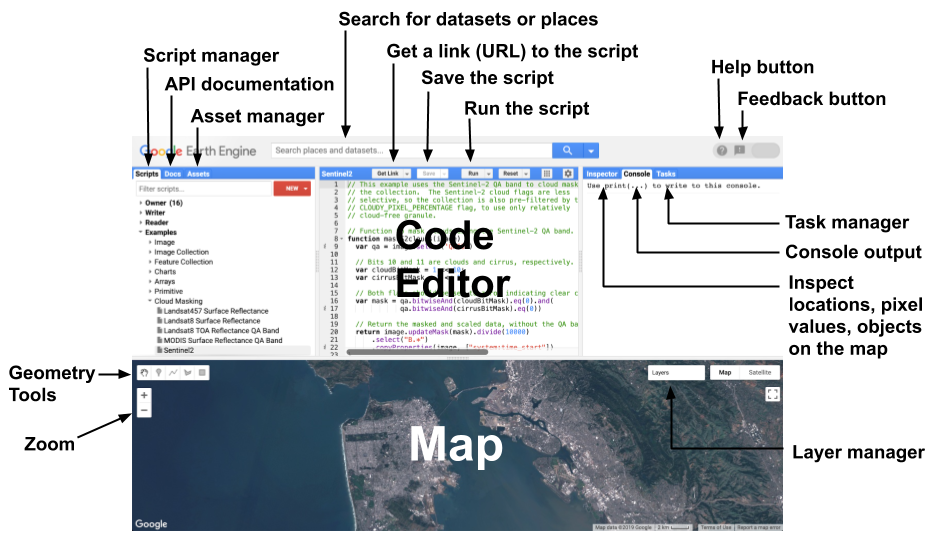

- GEE의 대표적인 객체들 (데이터 구조)
  - `Image`
    - GEE에서 `Image`는 위성 이미지, 토지 피복, 온도, 고도 등의 정보를 나타내는 래스터 데이터를 의미합니다. `Image`는 픽셀의 그리드로 구성되어 있으며, 각 픽셀은 특정 위치에 대한 값을 포함합니다. `Image`는 여러 밴드를 가질 수 있으며, 각 밴드는 동일한 위치에서 다른 유형의 데이터나 관측값을 저장할 수 있습니다.
  
    - 예: `Image`는 특정 지역의 위성 사진을 나타낼 수 있으며, 각기 다른 밴드는 가시광선, 적외선 등의 스펙트럼 정보를 보여줄 수 있습니다.
  
  - `ImageCollection`
  
  - `Geometry`
    - GEE에서 `Geometry`는 지구 표면상의 형태와 위치를 정의하는 데 사용됩니다. 이는 점(point), 선(line), 또는 폴리곤(polygon)일 수 있습니다. Geometry는 분석을 위한 관심 지역이나 공간 필터링을 위한 경계를 지정하는 데 필수적입니다.
  
    - 예: `Geometry`는 도시의 경계(폴리곤), 강의 경로(선), 기상 관측소의 위치(점)를 정의할 수 있습니다.

  - `Feature`
    - `Feature`는 공간 정보(`Geometry`로 정의됨)와 추가 속성 또는 특성을 결합한 것입니다. 기본적으로, 이는 설명적인 정보를 동반한 `Geometry`입니다. Features는 공간 데이터와 관련된 메타데이터를 저장하고 분석하는 데 유용합니다.
  
    - 예: `Feature`는 특정 숲 지역(`Geometry`로서의 폴리곤)과 숲의 유형, 나이, 수관 밀도와 같은 속성을 나타낼 수 있습니다.

  - `FeatureCollection`


<h3><font color='#a0d2eb'><strong>GEEMAP 패키지</strong></font></h3>

- [GEEMAP](https://geemap.org/): Google Earth Engine을 통한 인터랙티브한 지리공간 분석 및 시각화를 위한 파이썬 패키지

<br>

<div style ="text-align:center">
<img src="https://www.kdnuggets.com/wp-content/uploads/anello_geospatial_data_analysis_geemap_1.png" height="300px" >
</div>


##### 참고문헌
Wu, Q., (2020). geemap: A Python package for interactive mapping with Google Earth Engine. The Journal of Open Source Software, 5(51), 2305. https://doi.org/10.21105/joss.02305

<h2><font color='#a28089'><strong>3. Earth Engine Python API 이용을 위한 Setup</strong></font></h2>

<h3><font color='#a0d2eb'><strong>API 불러오기(import)와 토큰 인증</strong></font></h3>

- **EE API**는 **Colab**에 기본 설치되므로 불러오기와 인증단계만을 요구함. **Colab** 커널을 재시작하거나 **Colab** 가상머신이 비활성화로 인해 재시작하는 경우에도 이 단계를 거쳐야 함.

<h3><font color='#a0d2eb'><strong>Authenticate and initialize</strong></font></h3>

- `ee.Authenticate` 함수 실행: Earth Engine 서버 접속을 승인하기 위함
  
- `ee.Initialize` : 초기화
  
- 이 단계를 거치면 Earth Engine에 Google 계정 액세스 권한을 부여하라는 메시지가 표시되며 셀에 인쇄된 지침을 따름

In [ ]:
# Earth Engine API 불러오기 
import ee

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize(project='my-project')

<h2><font color='#a28089'><strong>4. 맵(Map) 시각화</strong></font></h2>

<h3><font color='#a0d2eb'><strong>인터랙티브 맵(Interactive map)</strong></font></h3>

- [geemap](https://github.com/gee-community/geemap) 라이브러리를 사용하여 ee.Image 객체를 대화형 [ipyleaflet](https://github.com/jupyter-widgets/ipyleaflet) 맵에 시각화한다.
  
- [실습] GEE API를 이용해서 한반도 상공의 Landsat 위성영상 찾기

In [ ]:
# geemap 리이브러리 설치 및 업데이트
%pip install -U geemap

# geemap 라이브러리 블러오기
import geemap
import geemap.colormaps as cm

In [ ]:
# 부산의 좌표(128.9697, 35.1796)를 Geometry 포인트로 생성하여 관심지역(roi: region of interest)으로 설정한다.
roi = ee.Geometry.Point(128.9697, 35.1796)

# GEE 카탈로그에 있는 Landsat-9 콜력션(LANDSAT/LC09/C02/T1_TOA) 이용
# 날짜로 영상 필터(filterDate) : 2022-01-01와 2022-12-01 사이
# 지역(영역) 필터(filterBounds)
# 구름 필터
landsat9 = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA')

l9filter= landsat9.filterDate(
    '2022-01-01', '2022-12-01').filterBounds(roi).filter(ee.Filter.lt('CLOUD_COVER', 10))

# True Color 영상합성을 위해 RGB밴드(B4, B3, B2) 선택 후 이들 영상 중 첫 영상(first)을 선택하여 trueColor432 변수에 할당
trueColor432 = l9filter.select(['B4', 'B3', 'B2']).first();

# 시각화
trueColor432Vis = {
  'min': 0.0,
  'max': 0.4,
};

# Map 인스턴스 생성
m = geemap.Map()

# 관심지역(roi)으로 map 이동 및 확대(8)
m.centerObject(roi, 8)

# trueColor432 영상을 레이어로 추가
m.add_layer(trueColor432, trueColor432Vis, 'True Color (432)')
m


<h3><font color='#a0d2eb'><strong>해저지형도 제작</strong></font></h3>

- GEE에서 제공하는 [ETOPO1](https://developers.google.com/earth-engine/datasets/catalog/NOAA_NGDC_ETOPO1#bands)의 수심자료를 이용하여 우리나라 주변해역에 대한 해저지형도를 그려보자.

- [ETOPO1](https://developers.google.com/earth-engine/datasets/catalog/NOAA_NGDC_ETOPO1#bands): ETOPO1은 지구 표면의 1 각분(arc-minute) 해상도의 글로벌 지형 모델로, 육상 지형과 해양 수심을 통합한 데이터임. 이 모델은 다양한 글로벌 및 지역 데이터 세트를 바탕으로 구축되었으며 ETOPO1은 두 가지 고도 밴드 `ice_surface`와 `bedrock`을 포함하고 있음
- [Marineregion.org](https://www.marineregions.org/eez.php)에서 제공하는 우리나라 EEZ 경계자료(shp포맷)를 이용하여 지도에 표시해보자.
  - 참고로, 다운받은 EEZ 자료를 자신 계정의 GEE Asset에 업로드하면 해당 Asset ID로 접근하여 이용할 수 있다.

In [ ]:
# 우리나라 관할해역
eez = ee.FeatureCollection("projects/ee-haebom/assets/kr_eez")
etopo = ee.Image('NOAA/NGDC/ETOPO1');
elevation = etopo.select('bedrock');
bathy = elevation.updateMask(elevation.lt(0));

# Set visualization parameters.
bathyVis = {
  'min': -7000.0,
  'max': 0.0,
  'palette': cm.palettes.gist_earth } # gist_earth는 GEEMAP 라이브러리에서 제공하는 팔레트


# Map 객체 생성
Map = geemap.Map(center=[37, 129], zoom=7)

# Map 객체에 bathymetry 레이어 추가
Map.addLayer(bathy, bathyVis, 'bathymetry')

# Map 객체에 EEZ 레이어 추가
Map.addLayer(eez, {}, 'eez')

# Map 표출
display(Map)


<h3><font color='#a0d2eb'><strong>등수심선(depth contour line) 그리기</strong></font></h3>

- 등수심선을 추가하여 해저지형을 상세하게 살펴보자

In [32]:

# 등심선(contour line) 생성 함수
def contour_f(line):
  binary_contour = bathy.convolve(ee.Kernel.gaussian(7, 5)).subtract(ee.Image.constant(line)).zeroCrossing()
  return binary_contour.multiply(ee.Image.constant(line)).toFloat().mask(binary_contour)

# 0에서 -4000미터 수심까지 50m 간격으로 등수심선 생성
lines = ee.List.sequence(-4000, 0, 50)
contourlines = lines.map(contour_f)
contourlines = ee.ImageCollection(contourlines).mosaic()

# 생성된 등수심선을 관할해역(EEZ)영역으로 클립핑(clip)
contourlines = contourlines.clip(eez);

# 등수심성을 레이어로 추가
# gist_earth_r은 gist_earth 색상의 역순(reverse)를 의미함
Map.addLayer(contourlines, {'min': -4000, 'max': 0, 'palette': cm.palettes.gist_earth_r}, 'contours') #['00ff00', 'ff0000']


<h3><font color='#a0d2eb'><strong>우리나라 바다의 최저 수심지역 찾기</strong></font></h3>

- `Reducer` 사용 : `Reducer`는 어스엔진에서 시간, 공간, 밴드, 배열과 같이 각각의 구조화된 데이터를 집계하는 함수
  - `reduceRegion()`
  - `ee.Reducer.min()`

- 좌표를 geemap의 maker를 이용하여 지도 상에 표시하기

- 인터넷 검색결과와 비교해 보기

In [ ]:

lonLatImage = ee.Image.pixelLonLat();
bathyWithLonLat = bathy.addBands(lonLatImage);

# EEZ 영역에 대한 수심을 집계하여 최저수심을 찾는다.
bathy_stats = bathyWithLonLat.reduceRegion(
    reducer=ee.Reducer.min(3), 
    geometry=eez,      
    scale=1000,        # bathy data의 resolution
    crs= 'EPSG:4326',  # crs(좌표참조시스템)는 EPSG:4326, 즉 WGS84 좌표계를 적용했음을 의미
)

# 최저수심과 해당 좌표를 출력
print(bathy_stats.getInfo())

min_depth = bathy_stats.getInfo()['min']
x_min = bathy_stats.getInfo()['min1']
y_min = bathy_stats.getInfo()['min2']

# 지도 상에 최조수심 위치를 마커로 표시하기
Map.add_marker(
    [y, x],
    shape="circle",
    radius=20,
    color="red",
    fill_color="#3388ff",
    fill_opacity=0.5,
)

Map


<h3><font color='#a0d2eb'><strong>왜 해저지형도가 필요한가</strong></font></h3>

- 참고자료: [국가해양기본도](https://blog.naver.com/koreamof/221913422494)
  
![국가해양기본도](https://github.com/Marino89/teacher_training/blob/main/bathy_chart.png?raw=true)



> ## 참고자료
>
- ### Markdwon
  - https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Cheat_sheet_for_Google_Colab.ipynb
  - https://colab.research.google.com/notebooks/markdown_guide.ipynb